In [ ]:
import numpy as np
import random

# Constants
GRID_SIZE = 5
PIT = -10
REWARD = 10
FREE = 0
NUM_EPISODES = 1000
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1

# Actions: 0 = UP, 1 = DOWN, 2 = LEFT, 3 = RIGHT
ACTIONS = [0, 1, 2, 3]

# Grid world definition
grid = np.zeros((GRID_SIZE, GRID_SIZE))
grid[1, 1] = PIT
grid[3, 3] = PIT
grid[4, 4] = REWARD

# Q-table initialization
Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE

def get_next_state(x, y, action):
    if action == 0:  # UP
        x -= 1
    elif action == 1:  # DOWN
        x += 1
    elif action == 2:  # LEFT
        y -= 1
    elif action == 3:  # RIGHT
        y += 1
    return x, y

def epsilon_greedy(x, y, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        return np.argmax(Q[x, y])

def update_Q(x, y, action, reward, next_x, next_y):
    best_next_action = np.max(Q[next_x, next_y])  # Bellman equation update (TD-based)
    Q[x, y, action] += ALPHA * (reward + GAMMA * best_next_action - Q[x, y, action])

# --- Markov Decision Process (MDP) Setup ---
def run_mdp():
    print("a) Markov Decision Process (MDP) Setup:")
    print("Grid setup: 5x5 grid with pits and rewards.")
    print("Pit locations: (1, 1), (3, 3)")
    print("Reward location: (4, 4)")
    print("The agent learns to avoid pits and maximize the reward.\n")

    # Q-table before any updates
    print("Q-table before MDP updates:")
    print(Q)

# --- Bellman Equation ---
def bellman_equation():
    print("\nb) Bellman Equation:")
    print("The Q-table will be updated using the Bellman equation.")
    print("Q(s, a) = Q(s, a) + α * (r + γ * max_a' Q(s', a') - Q(s, a))\n")

    # Just to simulate the Bellman equation for one update
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            for action in ACTIONS:
                next_x, next_y = get_next_state(x, y, action)
                if is_valid_state(next_x, next_y):
                    reward = grid[next_x, next_y]
                    update_Q(x, y, action, reward, next_x, next_y)

    print("Q-table after applying Bellman equation update:")
    print(Q)

# --- Q-Learning ---
def q_learning():
    print("\nc) Q-Learning:")
    print("The agent will follow the epsilon-greedy policy and update the Q-table after each episode.")
    print("The agent explores by taking random actions with probability epsilon, and exploits the best-known actions.\n")

    # Reset Q-table for Q-learning
    global Q
    Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

    for episode in range(NUM_EPISODES):
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        while grid[x, y] == PIT:
            x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)

        done = False
        while not done:
            action = epsilon_greedy(x, y, EPSILON)
            next_x, next_y = get_next_state(x, y, action)

            if not is_valid_state(next_x, next_y):
                next_x, next_y = x, y

            reward = grid[next_x, next_y]
            update_Q(x, y, action, reward, next_x, next_y)

            x, y = next_x, next_y
            if grid[x, y] == REWARD or grid[x, y] == PIT:
                done = True

    print("Q-table after Q-learning:")
    print(Q)

# --- Q-learning with Temporal Difference (TD) ---
def q_learning_td():
    print("\nd) Q-learning with Temporal Difference (TD):")
    print("Q-learning itself is a Temporal Difference (TD) method.")
    print("The Q-values are updated using estimates of future rewards after each action.\n")

    # Reset Q-table for Q-learning with TD
    global Q
    Q = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

    for episode in range(NUM_EPISODES):
        x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)
        while grid[x, y] == PIT:
            x, y = random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)

        done = False
        while not done:
            action = epsilon_greedy(x, y, EPSILON)
            next_x, next_y = get_next_state(x, y, action)

            if not is_valid_state(next_x, next_y):
                next_x, next_y = x, y

            reward = grid[next_x, next_y]
            update_Q(x, y, action, reward, next_x, next_y)

            x, y = next_x, next_y
            if grid[x, y] == REWARD or grid[x, y] == PIT:
                done = True

    print("Q-table after Q-learning with Temporal Difference (TD):")
    print(Q)

# Run each part and print the respective Q-table outputs
run_mdp()           # Markov Decision Process
bellman_equation()  # Bellman Equation
q_learning()        # Q-Learning
q_learning_td()     # Q-learning with Temporal Difference (TD)


a) Markov Decision Process (MDP) Setup:
Grid setup: 5x5 grid with pits and rewards.
Pit locations: (1, 1), (3, 3)
Reward location: (4, 4)
The agent learns to avoid pits and maximize the reward.

Q-table before MDP updates:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]

b) Bellman Equation:
The Q-table will be updated using the Bellman equation.
Q(s, a) = Q(s, a) + α * (r + γ * max_a' Q(s', a') - Q(s, a))

Q-table after applying Bellman equation update:
[[[ 0.    0.    0.    0.  ]
  [ 0.   -1.    0.    0.  ]
  [ 0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.  ]]

 [[ 0.    0.    0.   -1.  ]
  [ 0.   

In [ ]:
import numpy as np

# Define constants
PIT = -10      # Penalty for undesirable states
REWARD = 10    # Reward for reaching the goal state
FREE = 0       # Neutral states with no reward or penalty
gamma = 0.8    # Discount factor
alpha = 1      # Learning rate
num_episodes = 1000  # Number of episodes to train

# Define the number of states and actions
num_states = 6
num_actions = 6
goal_state = 5  # Define the goal state

# Initialize the reward matrix (R) with FREE values
R = np.full((num_states, num_actions), FREE)

# Set rewards and pits in the reward matrix
np.random.seed(0)  # Set seed for reproducibility
for i in range(num_states):
    for j in range(num_actions):
        if np.random.rand() < 0.2 and (i != goal_state and j != goal_state):
            R[i, j] = PIT  # Randomly assign pits
R[:, goal_state] = REWARD  # Set the reward for transitioning to the goal state

# Initialize the Q-matrix with zeros
Q = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in range(num_episodes):
    # Start from a random state
    state = np.random.randint(0, num_states)

    # Run until reaching the goal state
    while state != goal_state:
        # Get available actions in the current state
        actions = np.where(R[state] != PIT)[0]

        # Choose a random action from the available ones
        action = np.random.choice(actions)

        # Find the next state and get the maximum Q-value for the next state
        next_state = action
        max_Q_next = np.max(Q[next_state])

        # Update the Q-value using the Q-learning formula
        Q[state, action] = R[state, action] + gamma * max_Q_next

        # Move to the next state
        state = next_state

# Print the reward matrix and the final Q-matrix
print("Reward matrix (R):")
print(R)
print("\nFinal Q-matrix (Q):")
print(Q)

def find_optimal_path(Q, start_state, goal_state):
    path = [start_state]
    current_state = start_state

    while current_state != goal_state:  # Continue until we reach the goal
        # Choose the action with the highest Q-value
        action = np.argmax(Q[current_state])
        path.append(action)
        current_state = action  # Move to the next state

    return path

# Print optimal paths from each starting room to the goal state
print("\nOptimal paths from each room:")
for start_room in range(num_states - 1):  # Only rooms 0-4
    path = find_optimal_path(Q, start_room, goal_state)
    print(f"Room {start_room} to Outside (Room 5): {' -> '.join(map(str, path))}")


Reward matrix (R):
[[  0   0   0   0   0  10]
 [  0   0   0   0   0  10]
 [  0   0 -10 -10 -10  10]
 [  0   0   0   0   0  10]
 [-10   0 -10   0   0  10]
 [  0   0   0   0   0  10]]

Final Q-matrix (Q):
[[ 8.  8.  8.  8.  8. 10.]
 [ 8.  8.  8.  8.  8. 10.]
 [ 8.  8.  0.  0.  0. 10.]
 [ 8.  8.  8.  8.  8. 10.]
 [ 0.  8.  0.  8.  8. 10.]
 [ 0.  0.  0.  0.  0.  0.]]

Optimal paths from each room:
Room 0 to Outside (Room 5): 0 -> 5
Room 1 to Outside (Room 5): 1 -> 5
Room 2 to Outside (Room 5): 2 -> 5
Room 3 to Outside (Room 5): 3 -> 5
Room 4 to Outside (Room 5): 4 -> 5


In [ ]:
import numpy as np

def initialize_environment():
    # Define number of states (rooms 0-5) and actions (doors)
    n_states = 6  # rooms 0-4 plus outside (5)
    n_actions = 6  # possible doors to take

    # Initialize Q-matrix with zeros
    Q = np.zeros((n_states, n_actions))

    # Initialize reward matrix
    R = np.full((n_states, n_states), -10.)  # Default penalty for moves

    # Define specific rewards for connections
    connections = {
        (0, 1): 0,
        (1, 0): 0,
        (0, 3): 1,
        (3, 0): 1,
        (1, 2): 2,
        (2, 1): 2,
        (2, 3): 3,
        (3, 2): 3,
        (3, 4): 4,
        (4, 3): 4,
        (1, 5): 5,  # Door to outside
        (4, 5): 5,  # Door to outside
    }

    # Set rewards for transitions
    R[0, 1] = -1   # Small penalty for moving within rooms
    R[1, 0] = -1
    R[0, 3] = -1
    R[3, 0] = -1
    R[1, 2] = 2    # Reward for progressing in room sequence
    R[2, 1] = 2
    R[2, 3] = 5    # Higher reward for moving towards goal
    R[3, 2] = 5
    R[3, 4] = 7    # Moving closer to the goal
    R[4, 3] = 7
    R[1, 5] = 100  # Big reward for reaching outside (goal)
    R[4, 5] = 100

    return Q, R, connections

def q_learning(Q, R, connections, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    n_states = Q.shape[0]
    n_actions = Q.shape[1]

    for episode in range(episodes):
        # Start from a random room (except room 5 which is outside)
        current_state = np.random.randint(0, n_states-1)

        while current_state != 5:  # Continue until we reach outside
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                # Explore: random action
                possible_actions = [action for (s1, s2), action in connections.items() if s1 == current_state]
                if not possible_actions:
                    break
                action = np.random.choice(possible_actions)
            else:
                # Exploit: best known action
                possible_actions = [action for (s1, s2), action in connections.items() if s1 == current_state]
                if not possible_actions:
                    break
                action = possible_actions[np.argmax([Q[current_state, a] for a in possible_actions])]

            # Find next state based on action
            next_state = None
            for (s1, s2), a in connections.items():
                if s1 == current_state and a == action:
                    next_state = s2
                    break

            if next_state is None:
                break

            # Q-learning update
            best_next_q = np.max([Q[next_state, a] for (s1, s2), a in connections.items() if s1 == next_state]) if next_state != 5 else 0
            Q[current_state, action] = Q[current_state, action] + \
                                     alpha * (R[current_state, next_state] + gamma * best_next_q - Q[current_state, action])

            current_state = next_state

    return Q

def find_optimal_path(Q, connections, start_state):
    path = [start_state]
    current_state = start_state

    while current_state != 5:  # Continue until we reach outside
        possible_actions = [action for (s1, s2), action in connections.items() if s1 == current_state]
        if not possible_actions:
            break

        # Choose best action
        action = possible_actions[np.argmax([Q[current_state, a] for a in possible_actions])]

        # Find next state
        next_state = None
        for (s1, s2), a in connections.items():
            if s1 == current_state and a == action:
                next_state = s2
                break

        if next_state is None:
            break

        path.append(next_state)
        current_state = next_state

    return path

# Run the Q-learning algorithm
Q, R, connections = initialize_environment()
final_Q = q_learning(Q, R, connections)

# Print reward matrix
print("\nReward matrix:")
print(R)

# Print final Q-matrix
print("\nFinal Q-matrix:")
print(final_Q)

# Find optimal path from each starting room
print("\nOptimal paths from each room:")
for start_room in range(5):  # rooms 0-4
    path = find_optimal_path(final_Q, connections, start_room)
    print(f"Room {start_room} to Outside (Room 5): {' -> '.join(map(str, path))}")



Reward matrix:
[[-10.  -1. -10.  -1. -10. -10.]
 [ -1. -10.   2. -10. -10. 100.]
 [-10.   2. -10.   5. -10. -10.]
 [ -1. -10.   5. -10.   7. -10.]
 [-10. -10. -10.   7. -10. 100.]
 [-10. -10. -10. -10. -10. -10.]]

Final Q-matrix:
[[ 89.          45.26879808   0.           0.           0.
    0.        ]
 [ 77.2927866    0.          82.9210743    0.           0.
  100.        ]
 [  0.           0.          92.          82.36006904   0.
    0.        ]
 [  0.          52.59437414   0.          87.8         53.12670592
    0.        ]
 [  0.           0.           0.           0.          86.01999978
   79.41088679]
 [  0.           0.           0.           0.           0.
    0.        ]]

Optimal paths from each room:
Room 0 to Outside (Room 5): 0 -> 1 -> 5
Room 1 to Outside (Room 5): 1 -> 5
Room 2 to Outside (Room 5): 2 -> 1 -> 5
Room 3 to Outside (Room 5): 3 -> 2 -> 1 -> 5
Room 4 to Outside (Room 5): 4 -> 3 -> 2 -> 1 -> 5


In [ ]:
import numpy as np

# Define constants for MDP
num_states = 6       # Number of states
num_actions = 4      # Number of actions
gamma = 0.9          # Discount factor
threshold = 1e-4     # Convergence threshold

# Reward matrix R[state, action] gives the immediate reward for each action in each state
R = np.array([
    [0, -1, -10, -1],  # Rewards for actions from state 0
    [-1, 0, -1, -10],  # Rewards for actions from state 1
    [-10, -1, 0, -1],  # Rewards for actions from state 2
    [-1, -10, -1, 0],  # Rewards for actions from state 3
    [-1, -1, -1, 10],  # Rewards for actions from state 4
    [-10, -1, -1, 0]   # Rewards for actions from state 5 (goal state)
])

# Transition probabilities matrix T[state, action, next_state]
# For simplicity, assume deterministic transitions (each action leads to a specific next state)
T = np.zeros((num_states, num_actions, num_states))
for i in range(num_states):
    for j in range(num_actions):
        # Deterministic transition to the next state based on action
        T[i, j, (i + j + 1) % num_states] = 1

# Initialize the value function V(s) with zeros
V = np.zeros(num_states)

# Value Iteration using the Bellman Optimality Equation
def bellman_value_iteration():
    while True:
        delta = 0  # Track the maximum change in V for convergence
        for state in range(num_states):
            # Compute the value of each action for the current state
            action_values = []
            for action in range(num_actions):
                # Calculate the expected value of taking this action in this state
                expected_value = sum(T[state, action, next_state] * (R[state, action] + gamma * V[next_state])
                                     for next_state in range(num_states))
                action_values.append(expected_value)

            # Find the maximum action value for the current state
            max_action_value = max(action_values)

            # Calculate the difference (delta) for convergence check
            delta = max(delta, abs(V[state] - max_action_value))
            # Update the value function for the current state
            V[state] = max_action_value

        # Stop if the value function has converged
        if delta < threshold:
            break

# Run Value Iteration to apply the Bellman Optimality Equation
bellman_value_iteration()

# Extract the optimal policy
policy = np.zeros(num_states, dtype=int)
for state in range(num_states):
    action_values = []
    for action in range(num_actions):
        # Expected value for each action from the Bellman equation
        expected_value = sum(T[state, action, next_state] * (R[state, action] + gamma * V[next_state])
                             for next_state in range(num_states))
        action_values.append(expected_value)
    # Select the action with the highest expected value
    policy[state] = np.argmax(action_values)

# Print the results
print("Optimal Value Function (V):")
print(V)
print("\nOptimal Policy (Best action for each state):")
for state in range(num_states):
    print(f"State {state}: Take action {policy[state]}")


Optimal Value Function (V):
[42.1048732  42.1048732  42.1048732  42.1048732  47.89438588 37.89438588]

Optimal Policy (Best action for each state):
State 0: Take action 3
State 1: Take action 2
State 2: Take action 1
State 3: Take action 0
State 4: Take action 3
State 5: Take action 3


Initial State Values:

Grid Values:
[[0.81 0.9 1.0 1.0]
 [0.73 'X' 0.0 -1.0]
 [0.66 0.0 0.0 0.0]]

Iteration 1:

Grid Values:
[[0.81 0.9 1.9 1.0]
 [0.7290000000000001 'X' 0.9 -1.0]
 [0.657 0.5940000000000001 0.0 0.0]]

Iteration 2:

Grid Values:
[[0.81 1.71 1.9 1.0]
 [0.7290000000000001 'X' 1.71 -1.0]
 [0.6561000000000001 0.5913 0.81 0.0]]

Iteration 3:

Grid Values:
[[1.539 1.71 1.9 1.0]
 [0.7290000000000001 'X' 1.71 -1.0]
 [0.6561000000000001 0.7290000000000001 1.539 0.7290000000000001]]

Iteration 4:

Grid Values:
[[1.539 1.71 1.9 1.0]
 [1.3851 'X' 1.71 -1.0]
 [0.6561000000000001 1.3851 1.539 1.3851]]

Iteration 5:

Grid Values:
[[1.539 1.71 1.9 1.0]
 [1.3851 'X' 1.71 -1.0]
 [1.24659 1.3851 1.539 1.3851]]


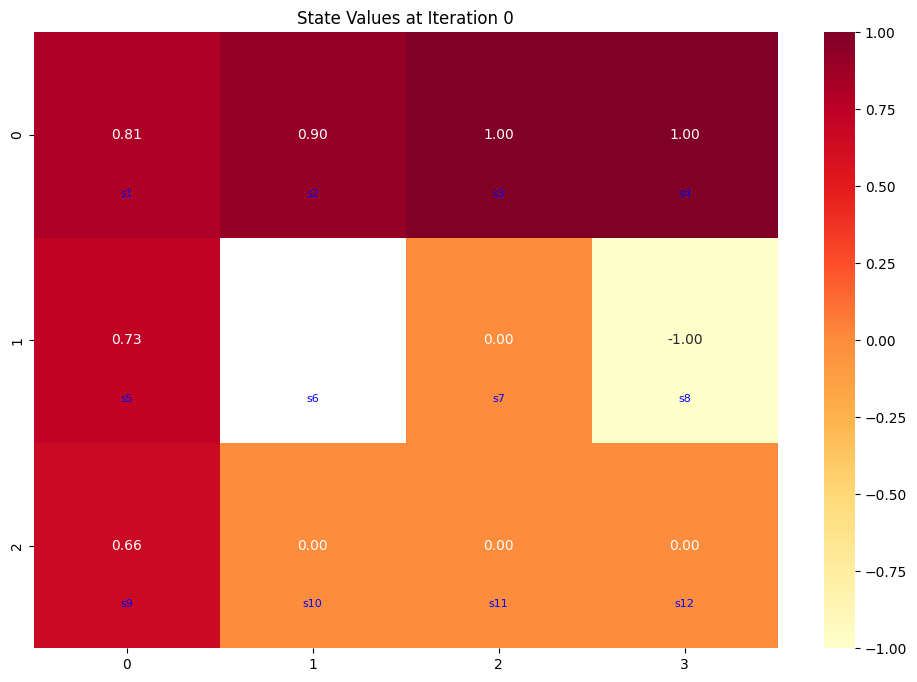

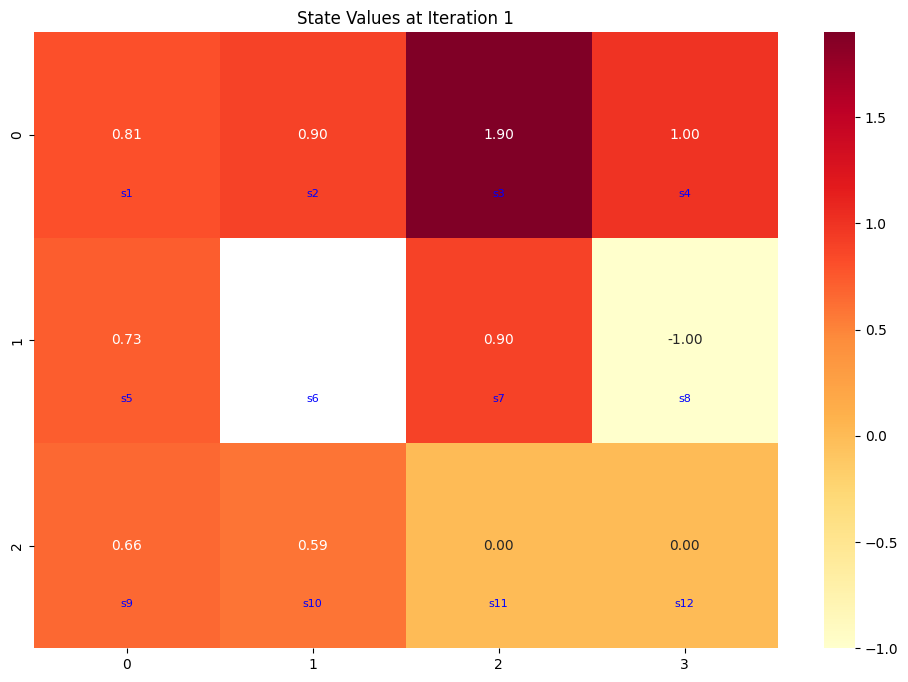

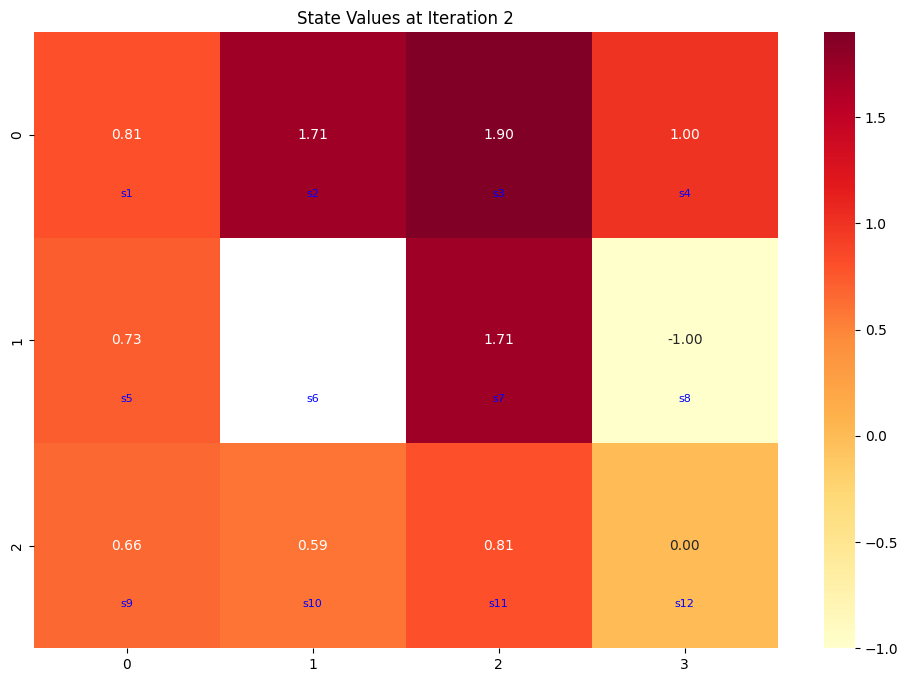

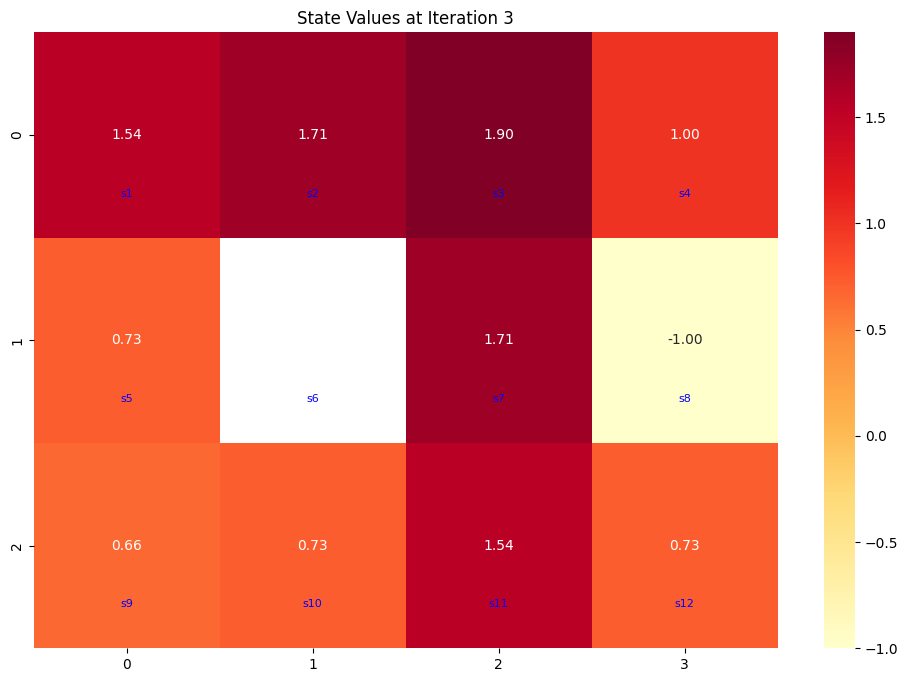

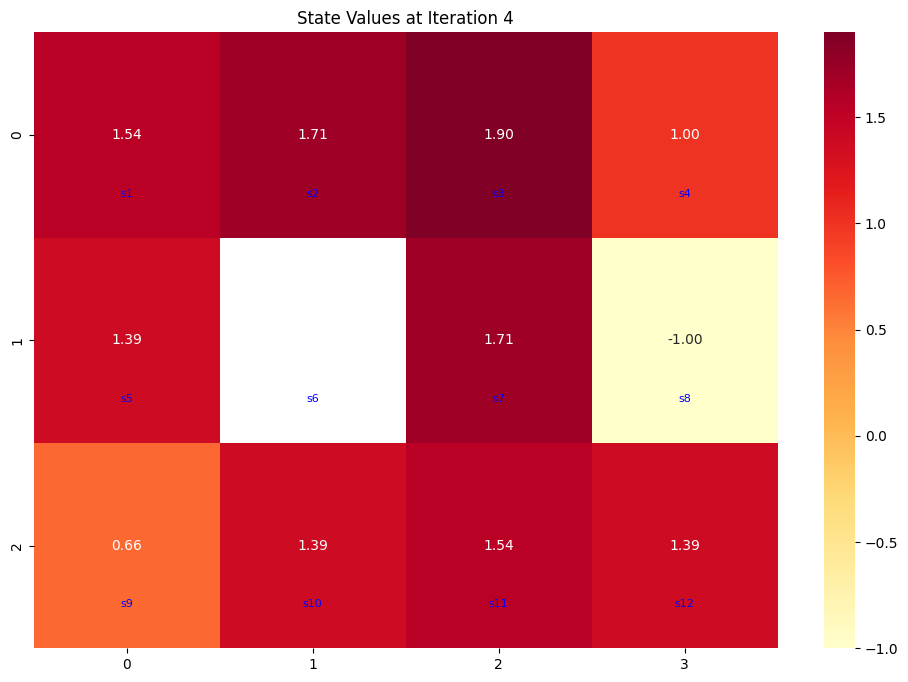

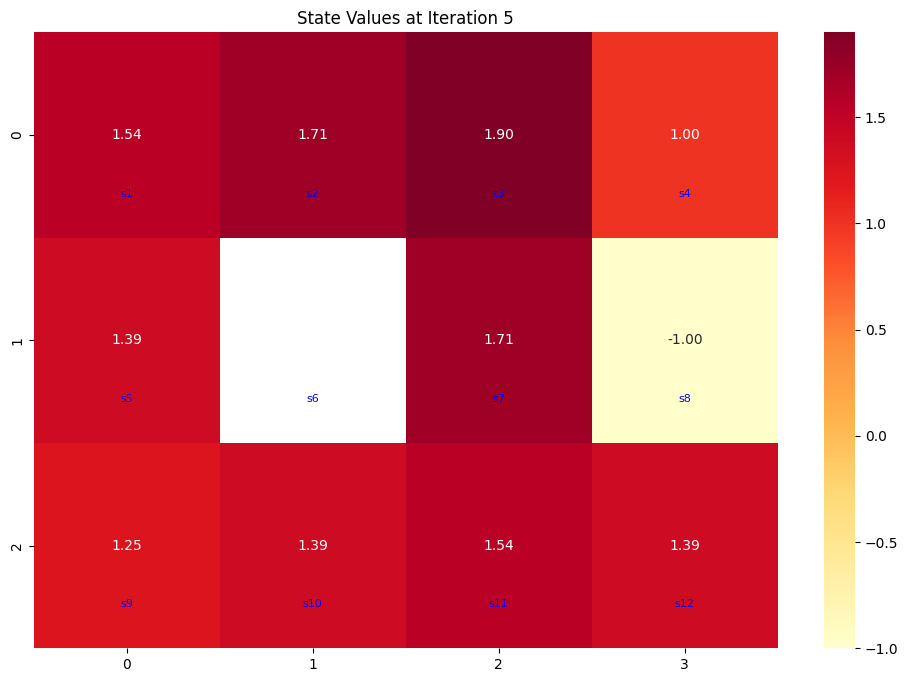

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class GridWorldStateValues:
    def __init__(self):
        # Initialize grid dimensions
        self.rows = 3
        self.cols = 4
        self.gamma = 0.9  # Discount factor

        # Initialize states dictionary with positions
        self.states = {
            's1': (0, 0), 's2': (0, 1), 's3': (0, 2), 's4': (0, 3),
            's5': (1, 0), 's6': (1, 1), 's7': (1, 2), 's8': (1, 3),
            's9': (2, 0), 's10': (2, 1), 's11': (2, 2), 's12': (2, 3)
        }

        # Initialize state values
        self.state_values = {
            's1': 0.81, 's2': 0.9, 's3': 1.0, 's4': 1.0,  # Diamond state
            's5': 0.73, 's6': None, 's7': 0.0, 's8': -1.0,  # Fire state
            's9': 0.66, 's10': 0.0, 's11': 0.0, 's12': 0.0
        }

        # Terminal and blocked states
        self.terminal_states = ['s4', 's8']  # Diamond and Fire
        self.blocked_states = ['s6']  # Purple block

    def get_valid_neighbors(self, state):
        """Get valid neighboring states"""
        row, col = self.states[state]
        neighbors = []

        # Check all possible moves (up, down, left, right)
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_row, new_col = row + dr, col + dc

            # Check if move is valid
            if (0 <= new_row < self.rows and
                0 <= new_col < self.cols):
                # Find the state name for this position
                for s, pos in self.states.items():
                    if pos == (new_row, new_col) and s not in self.blocked_states:
                        neighbors.append(s)

        return neighbors

    def update_state_values(self):
        """Update state values using Bellman equation"""
        history = []
        history.append(dict(self.state_values))

        for iteration in range(5):  # Perform 5 iterations
            new_values = dict(self.state_values)

            for state in self.states:
                if state in self.terminal_states or state in self.blocked_states:
                    continue

                neighbors = self.get_valid_neighbors(state)
                max_value = float('-inf')

                for next_state in neighbors:
                    if self.state_values[next_state] is not None:
                        # Calculate value using Bellman equation
                        reward = 1.0 if next_state == 's4' else -1.0 if next_state == 's8' else 0
                        value = reward + self.gamma * self.state_values[next_state]
                        max_value = max(max_value, value)

                if max_value != float('-inf'):
                    new_values[state] = max_value

            self.state_values = new_values
            history.append(dict(self.state_values))

            # Print current iteration values
            print(f"\nIteration {iteration + 1}:")
            self.print_grid_values()

        return history

    def print_grid_values(self):
        """Print the grid with state names and their values"""
        grid = np.full((self.rows, self.cols), None)
        for state, value in self.state_values.items():
            row, col = self.states[state]
            grid[row, col] = value if value is not None else 'X'

        print("\nGrid Values:")
        print(grid)

    def plot_state_values(self, iteration, values):
        """Plot the grid with state names and their values"""
        plt.figure(figsize=(12, 8))

        # Create grid for plotting
        grid = np.zeros((self.rows, self.cols))
        for state, value in values.items():
            row, col = self.states[state]
            grid[row, col] = value if value is not None else np.nan

        # Create heatmap
        sns.heatmap(grid, annot=True, fmt='.2f', cmap='YlOrRd',
                   mask=np.isnan(grid))

        # Add state labels
        for state, (row, col) in self.states.items():
            plt.text(col + 0.5, row + 0.8, state,
                    horizontalalignment='center',
                    color='blue', fontsize=8)

        plt.title(f'State Values at Iteration {iteration}')
        plt.show()

# Create and run the solver
solver = GridWorldStateValues()
print("Initial State Values:")
solver.print_grid_values()

# Update and track state values
history = solver.update_state_values()

# Plot the evolution of state values
for i, values in enumerate(history):
    solver.plot_state_values(i, values)